Importing the Libraries 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Importing Boston House Dataset      

In [6]:
housing = fetch_california_housing(as_frame=True)

In [7]:
# Convert to DataFrame
house_price_dataframe = housing.frame
print(house_price_dataframe.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [8]:
print("Dataset Shape:", house_price_dataframe.shape)

Dataset Shape: (20640, 9)


In [9]:
print(house_price_dataframe.isnull().sum())

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [10]:
print(house_price_dataframe.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

Correlation Heatmap

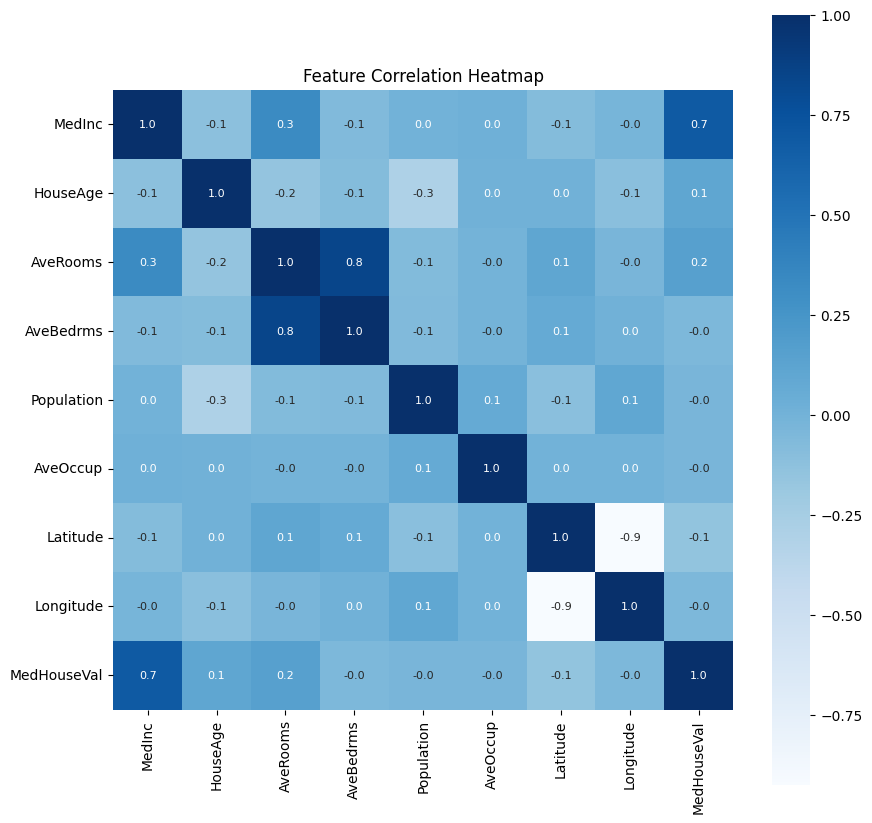

In [11]:
correlation = house_price_dataframe.corr()

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
plt.title("Feature Correlation Heatmap")
plt.show()

Splitting Features and Target 

In [12]:
X = house_price_dataframe.drop(["MedHouseVal"], axis=1) # Features
Y = house_price_dataframe['MedHouseVal'] # Target Variable

print(X.shape,Y.shape)

(20640, 8) (20640,)


In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X_train.shape, X_test.shape)

(16512, 8) (4128, 8)


Model Training - XGBoost

In [14]:
model = XGBRegressor()
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

Evaluation on Training Data 

In [15]:
training_data_prediction = model.predict(X_train)

score_1 = metrics.r2_score(Y_train, training_data_prediction)
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)


In [16]:
print("Training Performance")
print("R Squared Error:", score_1)
print("Mean Absolute Error:", score_2)

Training Performance
R Squared Error: 0.943650140819218
Mean Absolute Error: 0.1933648700612105


Visualize Predicted vs Actual

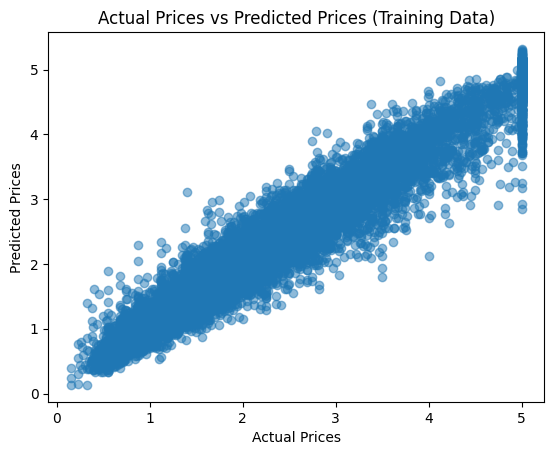

In [17]:
plt.scatter(Y_train, training_data_prediction, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices (Training Data)")
plt.show()

Evaluation on Test Data 

In [18]:
test_data_prediction = model.predict(X_test)

score_1 = metrics.r2_score(Y_test, test_data_prediction)
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

In [19]:
print("Test Performance")
print("R Squared Error:", score_1)
print("Mean Absolute Error:", score_2)

Test Performance
R Squared Error: 0.8338000331788725
Mean Absolute Error: 0.3108631800268186


Visualize predicted vs actual 

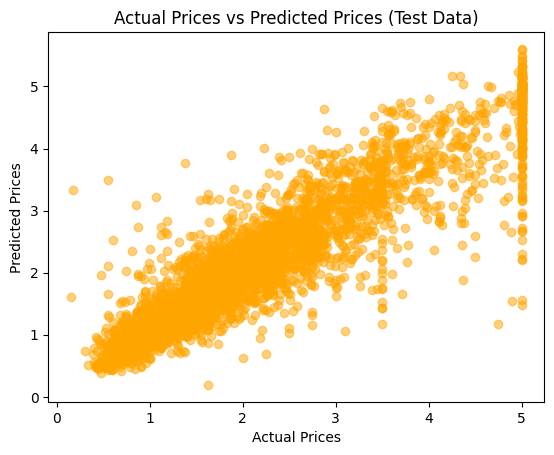

In [20]:
plt.scatter(Y_test, test_data_prediction, alpha=0.5, color='orange')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices (Test Data)")
plt.show()